### part 1: Stellar Classification

Use stratified split

Train a classification model

Print the classification report and write your findings

Create a confusion matrix, plot it as a heatmap and write your findings

In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv(r'C:\Users\laava\Desktop\sem 6\AOML\StarClassificationDataset.csv')
df.head(2)

C:\Users\laava\AppData\Local\Temp\ipykernel_22848\2952131643.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\laava\Desktop\sem 6\AOML\StarClassificationDataset.csv')


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY


In [20]:
df.isnull().sum()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

In [21]:
# Step 1: Replace empty strings or spaces with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Step 2: Convert problematic columns to numeric (if needed)
df['alpha'] = pd.to_numeric(df['alpha'], errors='coerce')
df['run_ID'] = pd.to_numeric(df['run_ID'], errors='coerce')

# Step 3: Drop rows with NaN
df.dropna(inplace=True)

# Step 4: Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Check the result
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   object_ID       99989 non-null  float64
 1   alpha           99989 non-null  float64
 2   delta           99989 non-null  float64
 3   UV_filter       99989 non-null  float64
 4   green_filter    99989 non-null  float64
 5   red_filter      99989 non-null  float64
 6   near_IR_filter  99989 non-null  float64
 7   IR_filter       99989 non-null  float64
 8   run_ID          99989 non-null  float64
 9   rerun_ID        99989 non-null  int64  
 10  cam_col         99989 non-null  int64  
 11  field_ID        99989 non-null  int64  
 12  spec_obj_ID     99989 non-null  float64
 13  red_shift       99989 non-null  float64
 14  plate_ID        99989 non-null  int64  
 15  MJD             99989 non-null  int64  
 16  fiber_ID        99989 non-null  int64  
 17  class           99989 non-null 

In [22]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop(columns=['class'])
y = df['class']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution of classes in the training and testing sets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

class
GALAXY    0.594417
STAR      0.215962
QSO       0.189621
Name: proportion, dtype: float64
class
GALAXY    0.594409
STAR      0.215972
QSO       0.189619
Name: proportion, dtype: float64


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Check the training score
train_score = clf.score(X_train, y_train)
print(f'Training Score: {train_score}')

Training Score: 0.9999874985935918


In [24]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11887
         QSO       0.96      0.93      0.95      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.98     19998
   macro avg       0.98      0.97      0.97     19998
weighted avg       0.98      0.98      0.98     19998



In [25]:
#QSO recall is a bit less

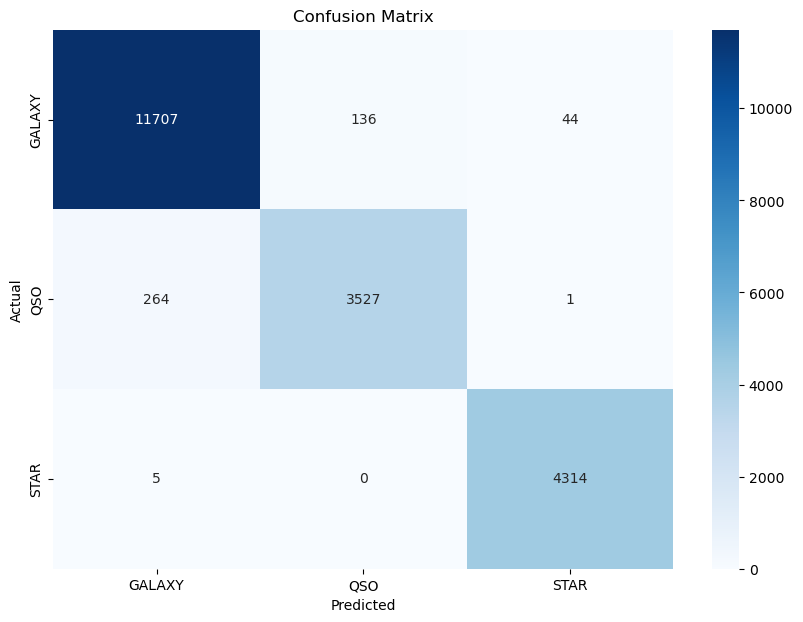

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the classifier performs very well with high precision and recall for all classes.

However, the recall for the QSO class is slightly lower compared to the other classes, indicating that some QSOs are misclassified.

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Predict the labels for the test set using the best estimator
y_pred_best = best_clf.predict(X_test)

# Generate the classification report
report_best = classification_report(y_test, y_pred_best)
print(report_best)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11887
         QSO       0.96      0.93      0.95      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.98     19998
   macro avg       0.98      0.97      0.97     19998
weighted avg       0.98      0.98      0.98     19998

